# The Dow Jones Index Data Set

## Background into the data set

First we'll start by importing all the necessary libraries.

In [1]:
# Importing libraries
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

Now we can read in the data set. We will have to remove the dollar sign from the data set as the dollar sign causes pandas to interpret these as strings. 

In [2]:
# Reading in the data set
df = pd.read_csv('https://raw.githubusercontent.com/declanbarr/DowJones/master/dow_jones_index.data')

In [3]:
# Showing the first 5 rows
df.head(5)

,quarter,stock,date,open,high,low,close,volume,percent_change_price,percent_change_volume_over_last_wk,previous_weeks_volume,next_weeks_open,next_weeks_close,percent_change_next_weeks_price,days_to_next_dividend,percent_return_next_dividend
0,1,AA,1/7/2011,$15.82,$16.72,$15.78,$16.42,239655616,3.79267,NaN,NaN,$16.71,$15.97,-4.428490,26,0.182704
1,1,AA,1/14/2011,$16.71,$16.71,$15.64,$15.97,242963398,-4.42849,1.380223,239655616.0,$16.19,$15.79,-2.470660,19,0.187852
2,1,AA,1/21/2011,$16.19,$16.38,$15.60,$15.79,138428495,-2.47066,-43.024959,242963398.0,$15.87,$16.13,1.638310,12,0.189994
3,1,AA,1/28/2011,$15.87,$16.63,$15.82,$16.13,151379173,1.63831,9.355500,138428495.0,$16.18,$17.14,5.933250,5,0.185989
4,1,AA,2/4/2011,$16.18,$17.39,$16.18,$17.14,154387761,5.93325,1.987452,151379173.0,$17.33,$17.37,0.230814,97,0.175029


In [4]:
# Showing how many rows and columns are in the dataset
rows, columns = df.shape

print(f"There are {rows} rows and {columns} columns")

There are 750 rows and 16 columns


In [5]:
# Setting the max number of rows and columns that are displayed
pd.options.display.max_rows = rows # Set max rows to number of rows in df (from https://pandas.pydata.org/pandas-docs/stable/options.html)
pd.options.display.max_columns = columns # Set max columns to number of columns in df (from https://pandas.pydata.org/pandas-docs/stable/options.html)

In [6]:
# Removing dollar sign
dfStrip = df.loc[:,['open', 'high', 'low', 'close', 'next_weeks_open', 'next_weeks_close']].apply(lambda x : x.str.strip('$'))

In [7]:
# Checking first 5 rows
dfStrip.head(5)

,open,high,low,close,next_weeks_open,next_weeks_close
0,15.82,16.72,15.78,16.42,16.71,15.97
1,16.71,16.71,15.64,15.97,16.19,15.79
2,16.19,16.38,15.60,15.79,15.87,16.13
3,15.87,16.63,15.82,16.13,16.18,17.14
4,16.18,17.39,16.18,17.14,17.33,17.37


In [8]:
# Replacing the values with the dollar sign with the stripped versions
df.loc[:,['open', 'high', 'low', 'close', 'next_weeks_open', 'next_weeks_close']] = dfStrip.astype(float)

In [9]:
# Viewing dataset
df

,quarter,stock,date,open,high,low,close,volume,percent_change_price,percent_change_volume_over_last_wk,previous_weeks_volume,next_weeks_open,next_weeks_close,percent_change_next_weeks_price,days_to_next_dividend,percent_return_next_dividend
0,1,AA,1/7/2011,15.82,16.72,15.78,16.42,239655616,3.792670,NaN,NaN,16.71,15.97,-4.428490,26,0.182704
1,1,AA,1/14/2011,16.71,16.71,15.64,15.97,242963398,-4.428490,1.380223,2.396556e+08,16.19,15.79,-2.470660,19,0.187852
2,1,AA,1/21/2011,16.19,16.38,15.60,15.79,138428495,-2.470660,-43.024959,2.429634e+08,15.87,16.13,1.638310,12,0.189994
3,1,AA,1/28/2011,15.87,16.63,15.82,16.13,151379173,1.638310,9.355500,1.384285e+08,16.18,17.14,5.933250,5,0.185989
4,1,AA,2/4/2011,16.18,17.39,16.18,17.14,154387761,5.933250,1.987452,1.513792e+08,17.33,17.37,0.230814,97,0.175029
5,1,AA,2/11/2011,17.33,17.48,16.97,17.37,114691279,0.230814,-25.712195,1.543878e+08,17.39,17.28,-0.632547,90,0.172712
6,1,AA,2/18/2011,17.39,17.68,17.28,17.28,80023895,-0.632547,-30.226696,1.146913e+08,16.98,16.68,-1.766780,83,0.173611
7,1,AA,2/25/2011,16.98,17.15,15.96,16.68,132981863,-1.766780,66.177694,8.002390e+07,16.81,16.58,-1.368230,76,0.179856
8,1,AA,3/4/2011,16.81,16.94,16.13,16.58,109493077,-1.368230,-17.663150,1.329819e+08,16.58,16.03,-3.317250,69,0.180941
9,1,AA,3/11/2011,16.58,16.75,15.42,16.03,114332562,-3.317250,4.419900,1.094931e+08,15.95,16.11,1.003130,62,0.187149


In [10]:
df.loc[:, ['stock','close']].groupby(by='stock').describe()

close                                                            
      count      mean       std     min     25%     50%     75%     max
stock                                                                  
AA     25.0   16.5044  0.772922   14.72   16.03   16.52   17.10   17.92
AXP    25.0   46.7124  2.396248   43.53   44.36   46.25   48.50   51.19
BA     25.0   73.4480  3.087631   69.10   71.64   72.69   74.84   79.78
BAC    25.0   13.0516  1.417382   10.52   11.93   13.37   14.25   15.25
CAT    25.0  103.1520  6.218651   92.75   99.59  103.54  107.21  115.41
CSCO   25.0   17.8992  1.984095   14.93   16.88   17.52   18.70   22.05
CVX    25.0  101.1756  5.267066   91.19   97.90  102.10  103.75  109.66
DD     25.0   52.8736  2.367048   48.35   50.29   52.91   54.63   56.79
DIS    25.0   41.2496  1.882473   37.58   39.45   41.52   42.95   43.56
GE     25.0   19.7840  0.912022   17.97   19.25   19.95   20.36   21.44
HD     25.0   36.5600  1.270213   33.47   36.00   37.01   37.42   38.48
HPQ    25.0   41.5364  4.263754   34.90   40.26   40.99   45.09   48.67
IBM    25.0  163.1016  5.730211  147.93  162.18  164.05  166.21  170.58
INTC   25.0   21.4352  1.072272   19.72   20.82   21.46   21.86   23.41
JNJ    25.0   62.6236  2.846177   58.57   60.01   62.55   65.69   66.77
JPM    25.0   44.4996  2.095094   39.49   43.15   44.91   45.74   48.00
KO     25.0   65.3264  1.970774   62.21   63.57   65.22   67.22   68.30
KRFT   25.0   32.5576  1.570584   30.53   31.26   31.70   34.08   35.23
MCD    25.0   77.2704  3.004153   72.99   75.01   76.14   80.36   82.52
MMM    25.0   91.6980  2.692709   86.23   90.25   91.80   93.22   97.21
MRK    25.0   34.3604  1.666357   31.91   33.06   34.04   35.82   37.35
MSFT   25.0   25.9208  1.416407   23.70   24.80   25.68   27.06   28.60
PFE    25.0   19.8216  0.915085   18.15   19.19   20.11   20.53   20.97
PG     25.0   64.0020  1.828795   60.60   62.59   64.30   65.27   67.36
T      25.0   29.6268  1.369257   27.49   28.43   30.34   30.71   31.41
TRV    25.0   59.1600  2.649218   53.33   57.92   59.21   61.18   63.43
UTX    25.0   84.0332  2.985547   79.08   82.52   83.52   85.32   89.58
VZ     25.0   36.4696  0.932820   34.95   35.84   36.31   37.26   38.47
WMT    25.0   53.9128  1.555639   51.52   52.54   53.66   55.29   56.70
XOM    25.0   82.1116  3.137743   75.59   79.78   82.63   84.50   87.98

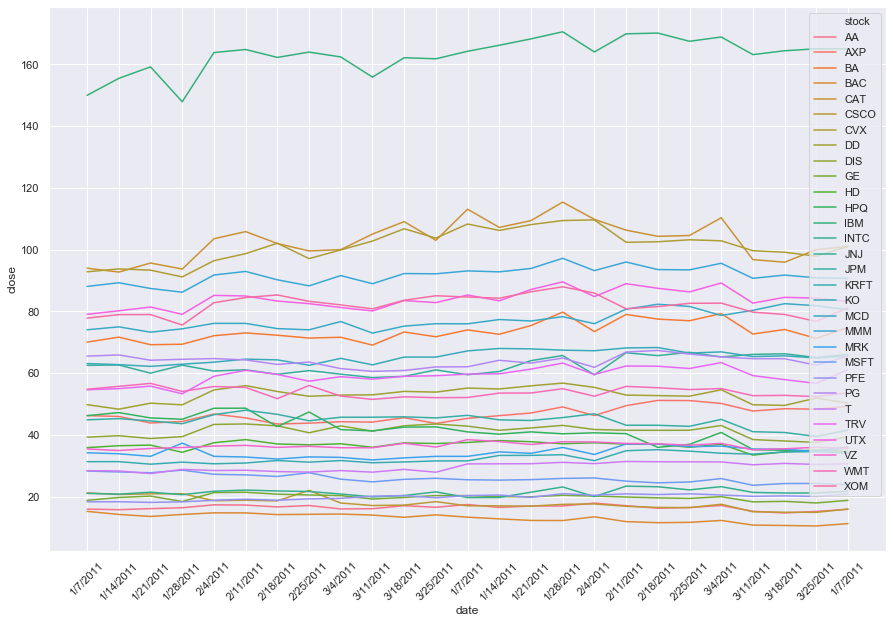

In [11]:
sns.set(rc={'figure.figsize':(15, 10)})

lineplot = sns.lineplot(data=df, x='date', y='close', hue='stock')

lineplot.set_xticklabels(df['date'],rotation=45)

plt.show()

In [12]:
AAQuotes = df.loc[df["stock"] == "AA", ["date", "open", "high", "low", "close"]]

In [13]:
from mpl_finance import candlestick_ohlc
import matplotlib.dates as mdates

AAQuotes["date"] = pd.to_datetime(AAQuotes["date"])
AAQuotes["date"] = mdates.date2num(AAQuotes["date"].values)

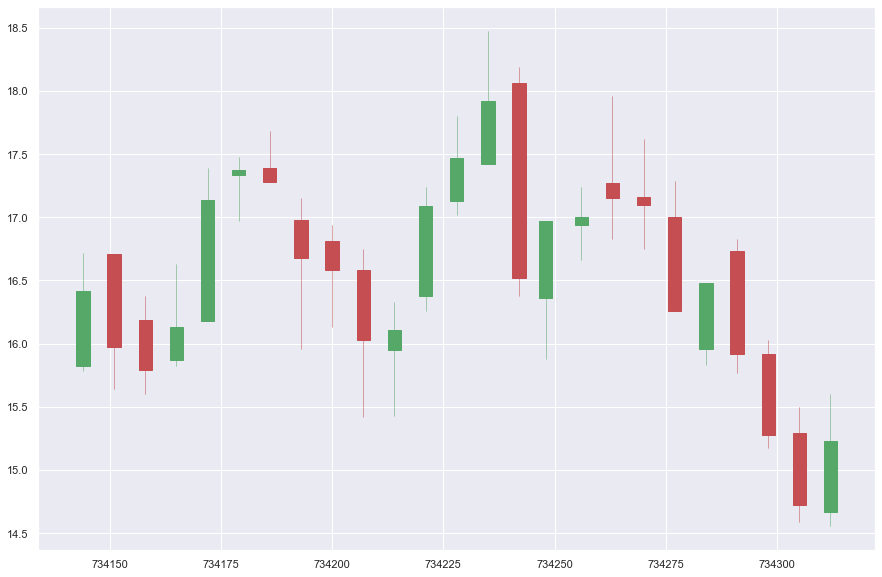

In [14]:
fig, ax = plt.subplots()
candlestick_ohlc(ax, 
                 quotes = AAQuotes.values, 
                 width=3,
                 colorup='g',
                 colordown='r',
                 alpha=1)

plt.show()